 ## ✅ Amazon Sales Analysis 
1. Descriptive Analysis
2. Product Performance Analysis
3. Pricing and Discount Analysis
4. Category-Based Analysis
6. Customer Behavior Analysis

In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display settings
pd.set_option('display.max_colwidth', None)
sns.set(style="whitegrid")


In [7]:
# Load data
df = pd.read_csv("data/cleaned_amazon_data.csv")

In [9]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,bayesian_rating,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5,subcategory_6,subcategory_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.199573,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4.000217,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3.902439,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN


 1. Descriptive Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_2160\3513930918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis', legend=False)


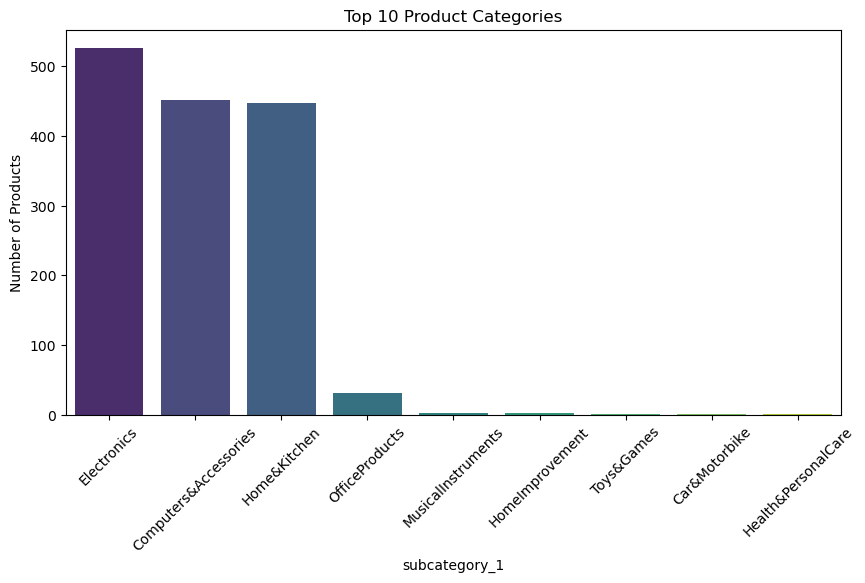

In [19]:
# Most common product categories
category_counts = df['subcategory_1'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis', legend=False)
plt.title('Top 10 Product Categories')
plt.xticks(rotation=45)
plt.ylabel('Number of Products')
plt.show()

In [20]:
# Average discount across all products
avg_discount = df['discount_percentage'].mean()
print(f"Average Discount: {avg_discount:.2%}")

Average Discount: 47.67%


In [25]:
# Average rating per category
avg_rating_by_cat = df.groupby('subcategory_1')['rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Category:\n", avg_rating_by_cat)


Average Rating by Category:
 subcategory_1
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.153097
Electronics              4.081749
Home&Kitchen             4.040402
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


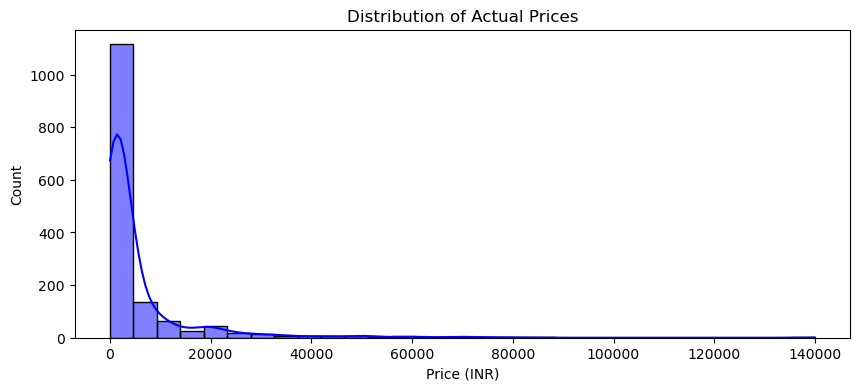

In [26]:
# Distribution of prices
plt.figure(figsize=(10, 4))
sns.histplot(df['actual_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Actual Prices')
plt.xlabel('Price (INR)')
plt.show()

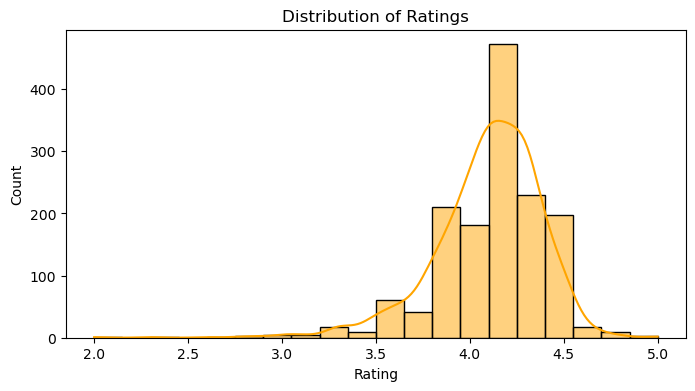

In [27]:
# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

2. Product Performance Analysis

In [43]:
# Top-rated products (with at least 10000 reviews)
top_rated = df[df['rating_count'] >= 10000 ].sort_values(by='rating', ascending=False)[['product_name', 'rating', 'rating_count']].head(10).reset_index(drop=True)
top_rated.index += 1 
print("\nTop Rated Products with 100+ Reviews:\n", top_rated)


Top Rated Products with 100+ Reviews:
                                                                                                                                                                                 product_name  \
1       Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))   
2                                                                                                       Spigen EZ Fit Tempered Glass Screen Protector Guard for iPhone 14/13/13 Pro - 2 Pack   
3                                                          Logitech G402 Hyperion Fury USB Wired Gaming Mouse, 4,000 DPI, Lightweight, 8 Programmable Buttons, Compatible for PC/Mac - Black   
4                                Logitech M331 Silent Plus Wireless Mouse, 2.4GHz with USB Nano Receiver, 1000 DPI Optical Tracking, 3 Buttons, 24 Month Life Battery, PC/Mac/Laptop - Black   


In [44]:
# Most reviewed products
most_reviewed = df.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count', 'rating']].head(10).reset_index(drop=True)
most_reviewed.index += 1
print("\nMost Reviewed Products:\n", most_reviewed)


Most Reviewed Products:
                                                                                                     product_name  \
1                                      AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot   
2                                                     Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black   
3                            Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black   
4                                      AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot   
5                                                boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)   
6                                                 boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)   
7                                                    boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)   
8                   Redmi 9 Activ (Carbon Blac

In [46]:
# Products with high ratings but few reviews
hidden_gems = df[(df['rating'] >= 4.5) & (df['rating_count'] < 20)][['product_name', 'rating', 'rating_count']].sort_values(by='rating', ascending=False).head(10)
print("\nHidden Gems (High Rating, Few Reviews):\n", hidden_gems)


Hidden Gems (High Rating, Few Reviews):
                                                                                                                                                                                                 product_name  \
174                          Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)   
1292                                                                 Melbon VM-905 2000-Watt Room Heater (ISI Certified, White Color) Ideal Electric Fan Heater for Small to Medium Room/Area (Plastic Body)   
299   WANBO X1 Pro (Upgraded) | Native 1080P Full HD | Android 9 | Projector for Home | LED Cinema | 350ANSI | 3900 lumens | WiFi Bluetooth | HDMI ARC | Dolby DTS | 4D Keystone Correction (Global Version)   
1157                                                                                                                    !!1000

In [49]:
# Display ordered list of top-rated, most reviewed, and hidden gems
print("\n===== Ordered Product Lists =====")
print("\n1. Top Rated (100+ Reviews):")
print(top_rated.to_string())

print("\n2. Most Reviewed:")
print(most_reviewed.to_string())

print("\n3. Hidden Gems (High Rating, Low Reviews):")
print(hidden_gems.to_string())


===== Ordered Product Lists =====

1. Top Rated (100+ Reviews):
                                                                                                                                                                                product_name  rating  rating_count
1       Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))     4.8         53803
2                                                                                                       Spigen EZ Fit Tempered Glass Screen Protector Guard for iPhone 14/13/13 Pro - 2 Pack     4.6         26603
3                                                          Logitech G402 Hyperion Fury USB Wired Gaming Mouse, 4,000 DPI, Lightweight, 8 Programmable Buttons, Compatible for PC/Mac - Black     4.6         10760
4                                Logitech M331 Silent Plus Wireless Mouse, 2.4GHz with USB 

3. Pricing and Discount Analysis


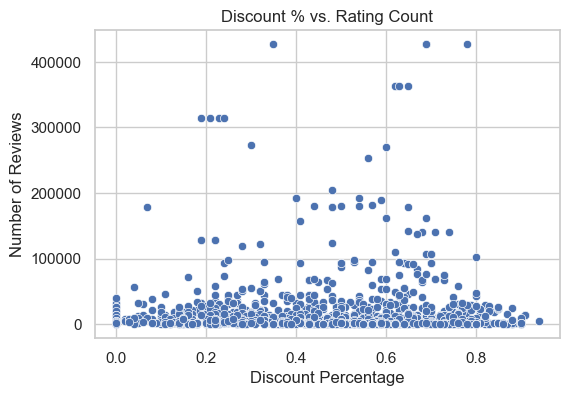

In [51]:
# Correlation between discount and rating count
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='discount_percentage', y='rating_count')
plt.title('Discount % vs. Rating Count')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Reviews')
plt.show()

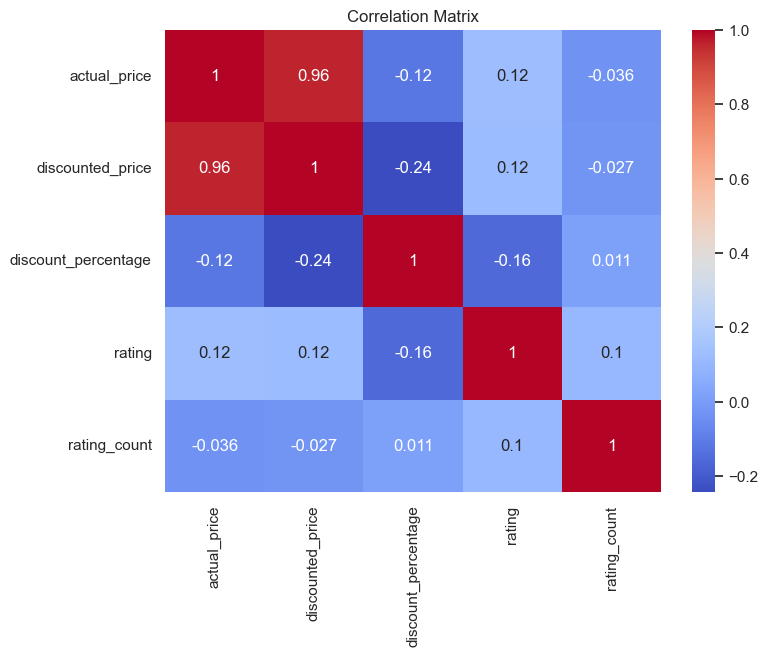

In [52]:
# Correlation matrix
correlation = df[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
# Categories with highest average discount
top_discount_categories = df.groupby('subcategory_1')['discount_percentage'].mean().sort_values(ascending=False)
print("\nTop Categories by Avg Discount:\n", top_discount_categories.head(10))



Top Categories by Avg Discount:
 subcategory_1
HomeImprovement          0.575000
Computers&Accessories    0.539779
Health&PersonalCare      0.530000
Electronics              0.508289
MusicalInstruments       0.460000
Car&Motorbike            0.420000
Home&Kitchen             0.401205
OfficeProducts           0.123548
Toys&Games               0.000000
Name: discount_percentage, dtype: float64


4. Category-Based Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_2160\3556429923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_cat.index[:10], y=avg_rating_by_cat.values[:10], palette='crest')


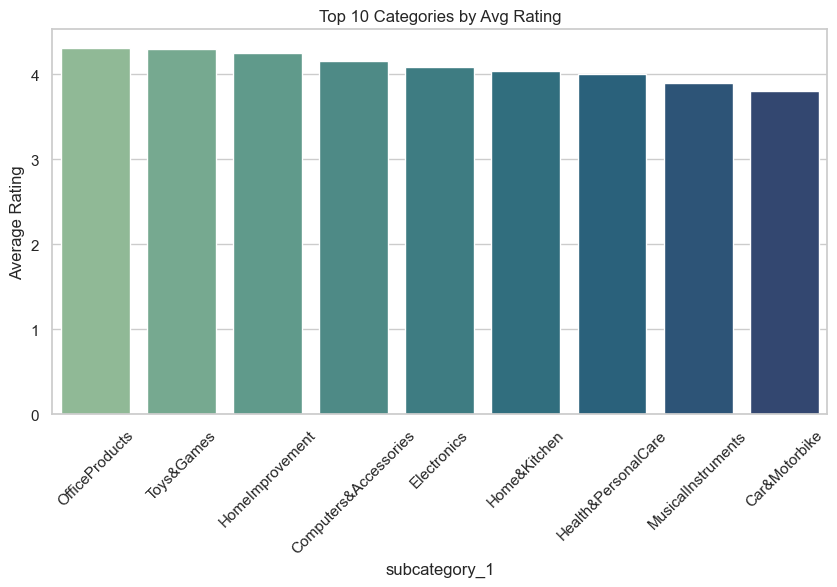

In [54]:
# Average rating per subcategory
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_by_cat.index[:10], y=avg_rating_by_cat.values[:10], palette='crest')
plt.title('Top 10 Categories by Avg Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

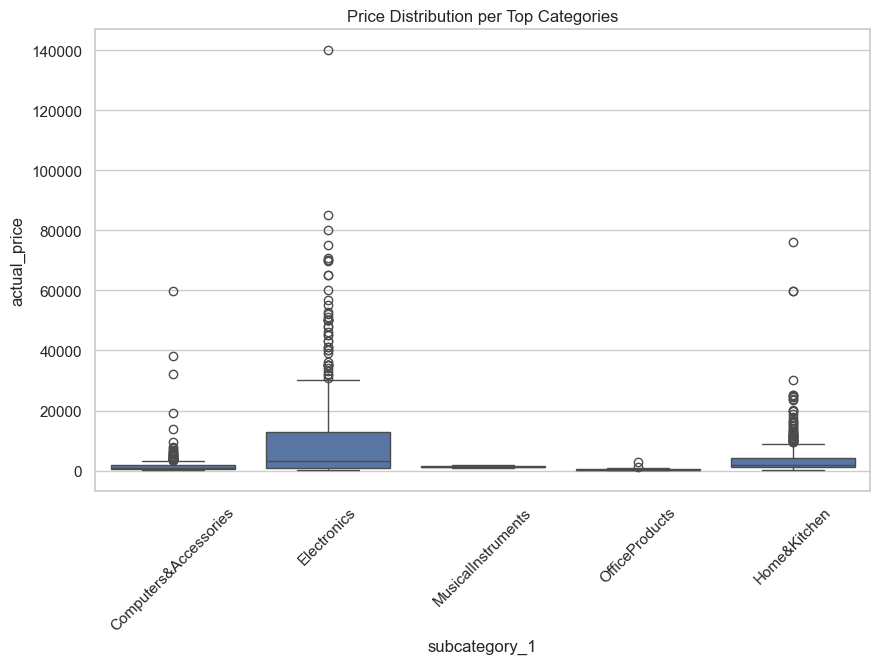

In [55]:
# Boxplot of actual price per top categories
top_categories = category_counts.index[:5]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['subcategory_1'].isin(top_categories)], x='subcategory_1', y='actual_price')
plt.title('Price Distribution per Top Categories')
plt.xticks(rotation=45)
plt.show()

6. Customer Behavior Analysis

In [56]:
# Number of unique users
unique_users = df['user_id'].nunique()
print(f"\nNumber of Unique Users: {unique_users}")


Number of Unique Users: 1193



Users with Multiple Reviews:
 user_id
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q    10
AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ     8
AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQOHDBQLVDJTQ,AG7EZVSAXIVGMNDLSA55K7URQCJA,AGGF75HIEMB67OU7J3RDALBSUKQQ,AHY5CI4SU6JBYPIZ5RLAGO6W3F4A,AE4KODNBVTDCZWZO4HZM4GTRERPA,AH6HFHSYOY2OHMODD7244DHG7FUQ,AHRW5JERWYAJCZO65PDKZSOEPR6Q     8
AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q     7
AECPFYFQV

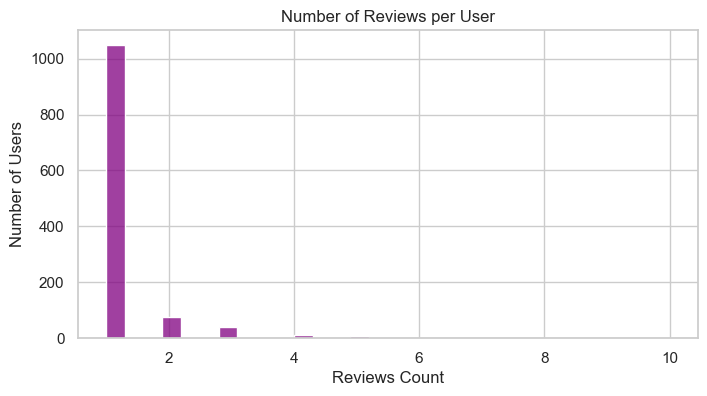

In [58]:
# Number of products reviewed per user (if multiple reviews exist)
user_review_counts = df['user_id'].value_counts()
multi_review_users = user_review_counts[user_review_counts > 1]
print("\nUsers with Multiple Reviews:\n", multi_review_users.head(10))

plt.figure(figsize=(8, 4))
sns.histplot(user_review_counts, bins=30, color='purple')
plt.title('Number of Reviews per User')
plt.xlabel('Reviews Count')
plt.ylabel('Number of Users')
plt.show()